# HW 6



In [61]:
import pandas as pd
import numpy as np
from IPython.core.debugger import Tracer
import matplotlib.pyplot as plt
%matplotlib inline

## P1
(b) In general, deterministic noise will increase. Deterministic noise is the difference between the target function and the closest hypothesis in your hypothesis set

## P2

(a) 0.03, 0.08

In [13]:
from sklearn import linear_model

f = open("in.dta", "rb")
train = pd.read_table("in.dta", delim_whitespace=True, header=None, names="x1 x2 y".split())
test = pd.read_table("out.dta", delim_whitespace=True, header=None, names="x1 x2 y".split())
X_train = train["x1 x2".split()]
y_train = train[["y"]]
X_test = test["x1 x2".split()]
y_test = test[["y"]]

def phi(X):
    Z = pd.DataFrame()
    Z["x1"] = X["x1"]
    Z["x2"] = X["x2"]
    Z["x1_sq"] = X.eval("x1 ** 2")
    Z["x2_sq"] = X.eval("x2 ** 2")
    Z["x1x2"] = X.eval("x1 * x2")
    Z["diff"] = X.eval("abs(x1 - x2)")
    Z["sum"] = X.eval("abs(x1 + x2)")
    Z["b"] = 1
    return Z

def get_class_error(model, X, y):
    matches = (np.sign(model.predict(X)) == y).values
    return (~matches).sum()/float(len(matches))
    


Z_train = phi(X_train)
Z_test = phi(X_test)
lin_reg = linear_model.LinearRegression(fit_intercept=False)
model = lin_reg.fit(Z_train, y_train)
err_in = get_class_error(model, Z_train, y_train)
err_out = get_class_error(model, Z_test, y_test)

print("err_in : %.4f" % err_in)
print("err_out : %.4f" % err_out)

err_in : 0.0286
err_out : 0.0840


## P3

(d) 0.03, 0.08

Now, we introduce weight decay, with a term of the form $\frac{\lambda}{N} \sum_{i=0}^{7} w_i^2$
The solution is then given by $w = (Z^\top Z + \lambda I)^{-1} Z^\top y$

In [44]:
Z_train = phi(X_train)
d = Z_train.shape[1]

def fit_reg(k):
    l_reg = 10 ** k
    pseudo_inverse = np.linalg.inv(np.transpose(Z_train).dot(Z_train) + l_reg * np.identity(d)).dot(np.transpose(Z_train))
    w = pseudo_inverse.dot(y_train)

    def get_class_error(weights, X, y):
        matches = (np.sign(X.values.dot(weights)) == y).values
        return (~matches).sum()/float(len(matches))

    return {
        "Ein": get_class_error(w, Z_train, y_train), 
        "Eout": get_class_error(w, Z_test, y_test)
    }

fit_reg(-3)

{'Ein': 0.028571428571428571, 'Eout': 0.080000000000000002}

## P4

(e) 0.4, 0.4

In [45]:
fit_reg(3)

{'Ein': 0.37142857142857144, 'Eout': 0.436}

## P5
(d) -1

In [51]:
choices = [2,1,0,-1,2]
eouts = [fit_reg(k)["Eout"] for k in choices]
best = choices[eouts.index(min(eouts))]
print("best k : %d" % best)

best k : -1


## P6
(b) 0.06


0.056


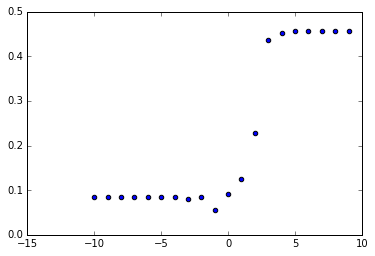

In [64]:
test_ks = range(-10,10)
eouts = [fit_reg(k)["Eout"] for k in test_ks]
plt.scatter(test_ks, eouts)
print(min(eouts))

## P7
(c) 

Note that $\mathcal{H}(10,0,n) = \mathcal{H}_{n-1}$ for $n \le 10$. If you kill all weights above $n$, you have the class of $n-1$ order polynomials. <br>

Thus, c is the answer. $\mathcal{H}(10,0,3)$ consists of quadratics, and $\mathcal{H}(10, 0, 4)$ consists of cubics. Their intersection is quadratics, or $\mathcal{H}_2$.




## P8
(d) 45

On the forward pass, we have one operation for each weight, giving 13 operations.

Backpropagation: For each node, we need to consider each higher level node that it can trigger. 
The output layer has no ops, since delta is just $\theta'(s_2^2)$. 
Each node in the middle layer has one op, since it only affects the single output node. The deltas are given by $\delta_i^1 = \delta_1^2 w_{i1}^2 \theta'(s_i^1)$. 
Finally, in the input layer, each node affects the output via the 3 hidden layer nodes. The update rule is like the middle layer, but we have 3 operations per weight, giving 15 ops. 

To update the weights, we need one operation per weight, since $w_{ij}^l(t+1) = w_{ij}^l(t) - \eta \delta_j^l x_i^{l-1}$

This gives a total of $13 + 18 + 13 = 44$ ops


## P9

(a) 46

Consider a network where each hidden layer contains a constant unit and a non-constant unit. 
There need to be 18 hidden layers to use up the 36 hidden weights. The first has 10 incoming weights, one for each input unit. 
The last 17 all have two incoming weights, going from each of the 2 units of the previous layer to the non-constant unit. 
The output layer will also have 2 weights. This gives a total of $10 + 2 (17 + 1) = 46$.

## P10
(e) 510

In [80]:
def nweight(layers):
    assert sum(layers) == 36
    weights = 10 * (layers[0] - 1)
    for prev_ind, layer in enumerate(layers[1:]):
        weights += (layer - 1) * layers[prev_ind]
    return weights + layers[-1]

nweight([22, 14])

510